### Panorama do COVID-19 no Brasil

### Obtenção dos Dados

Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.

Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.

### Dicionário de Variáveis

* Construa um dicionário de variáveis.
    
    * A descrição do nome de cada coluna pode ser encontrada neste link.
### Importando os dados do COVID-19

* Você deve entrar no site https://github.com/owid/covid-19-data/tree/master/public/data e conhecer a base dados. Usaremos o formato csv neste projeto.



In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta


In [388]:
#importando dataset .
covid = pd.read_csv(r"C:\Users\joaog\GitProjetos\DataScience_dados_projetos\owid-covid-data.csv", sep=",")
codebook = pd.read_csv(r"C:\Users\joaog\GitProjetos\DataScience_dados_projetos\owid-covid-codebook.csv", sep=",")

#Analisando as primeiras linhas.
covid.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [389]:
#Analisando todas as colunas que temos em nosso dataset.
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [390]:
#Características das variáveis, disponibilizado Our World in Data.
codebook.head()

,column,source,category,description
0,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country codes
1,continent,Our World in Data,Others,Continent of the geographical location
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Data Repository by the Center for Sys...,Confirmed cases,Total confirmed cases of COVID-19


In [391]:
#Analisando a quantidade de linhas e colunas do nosso dataset.
print("A quantidade de linhas desse dataframe é igual a : {} linhas" .format(covid.shape[0]))
print("A quantidade de colunas desse dataframe é igual a : {} colunas" .format(covid.shape[1]))

#Criando dataframe com informações de quantidade de linhas e colunas
dados = [covid.shape[0], covid.shape[1]]
index = ["Linhas", "Colunas"]
pd.DataFrame(data=dados,index=index, columns=["Quantidade"])

A quantidade de linhas desse dataframe é igual a : 153872 linhas
A quantidade de colunas desse dataframe é igual a : 67 colunas


,Quantidade
Linhas,153872
Colunas,67


In [392]:
print("A quantidade de localidade geográficas que temos nesse conjunto de dados é",len(covid["location"].unique()))

A quantidade de localidade geográficas que temos nesse conjunto de dados é 238


In [393]:
covid["date"] = pd.to_datetime(covid["date"])
covid["date"].max()

Timestamp('2022-01-11 00:00:00')

In [394]:
#podemos analisar que quando o continent está com valor Nulo, as localizações estão informando valores referentes aos continente.
#A seguir iremos ver os paises que tiveram o maior numero de infectados então iremos excluir essas linhas que apresentam NaN.
covid[covid["continent"].isnull()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
688,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
691,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151897,OWID_WRL,NaN,World,2022-01-07,303270379.0,2914817.0,2149785.429,5480300.0,7269.0,6086.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
151898,OWID_WRL,NaN,World,2022-01-08,305334730.0,2064351.0,2283772.286,5485330.0,5030.0,6215.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
151899,OWID_WRL,NaN,World,2022-01-09,307343166.0,2008436.0,2446502.714,5489287.0,3957.0,6344.429,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
151900,OWID_WRL,NaN,World,2022-01-10,310629511.0,3286345.0,2555374.857,5495713.0,6426.0,6420.000,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [395]:
#Iremos fazer uma seleção no nosso banco de dados, iremos selecionar so as datas mais atuais.
query = covid["date"] == covid["date"].max()
#Eliminamos todos os Continente que apresentavam NaN, pois essas linhas eram referentes 
covid_max_data = covid[(query)].dropna(subset=["continent"])


In [396]:
len(covid["iso_code"].unique())

238

In [397]:
#verificando se existe alguma localidade duplicada no dia mais atual do nosso dataset.
print("Nosso conjunto de dados possui um total de {} duplicatas na coluna de localização".format(covid_max_data["location"].duplicated().sum()))

Nosso conjunto de dados possui um total de 0 duplicatas na coluna de localização


In [398]:
# Capturando a quantidade total de casos de cada um dos paises.
total_cases = covid_max_data.sort_values(by=["total_cases"] ,ascending=False)
total_cases[["location" ,"total_cases"]]

,location,total_cases
146177,United States,62308472.0
65277,India,35875790.0
20430,Brazil,22636359.0
145456,United Kingdom,14767284.0
50605,France,12620080.0
...,...,...
119411,Samoa,3.0
32147,Cook Islands,2.0
74751,Kiribati,2.0
139651,Tonga,1.0


C:\Users\joaog\AppData\Local\Temp/ipykernel_172/3721306023.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,


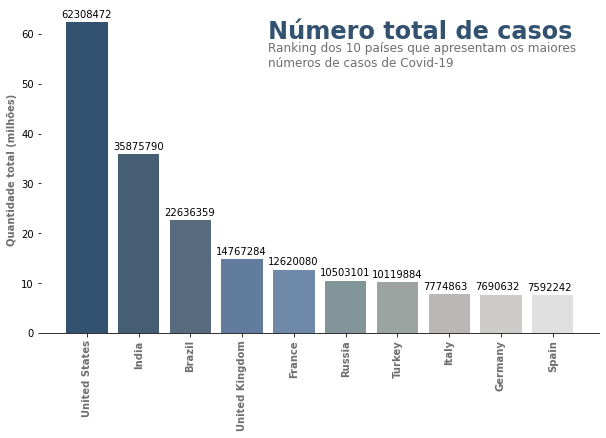

In [399]:
import seaborn as sns
#Selecionando dados para a plotagem.
x = total_cases["location"][0:10]
y = total_cases["total_cases"][0:10]


#Criando gráfico
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y, color=sns.blend_palette(["#32526f", "#576879", "#6686ad", "#8a9994", "#c0baba", "#e0e0e0"], 10))

#configurações de layout e eixos (class axes)
ax.set_xticklabels(x, 
        rotation = 90, 
        fontweight="bold", 
        color="#6F6F6F")
        #configurando nome dos marcadores e rotacionando 90 graus
ax.spines[["right", "top", "left"]].set_visible(False) #eliminando linhas laterais e superior
ax.set_yticks(range(0,70000000,10000000)); #configurando marcadores do eixo y 
ax.set_yticklabels(labels=["0", "10","20", "30", "40", "50", "60"]); #configurando nome dos marcadores do eixo y
ax.text(3.5,59000000, 
        "Número total de casos",
        fontweight="bold", 
        fontsize=24, 
        color="#32526f")
ax.text(3.5,53500000, 
        "Ranking dos 10 países que apresentam os maiores \nnúmeros de casos de Covid-19", 
        fontsize=12, 
        color="#6F6F6F")

for i, j in enumerate(total_cases["total_cases"][:10]): #criando anotações acima das barras e configurando posições
    ax.annotate(str(int(j)),(i-0.5,j+1000000))
ax.set_ylabel("Quantidade total (milhões)", fontweight="bold", color="#6F6F6F")
plt.savefig(r"C:\Users\joaog\Desktop\grafico_rank.png", dpi=72, bbox_inches='tight')

In [400]:
data_6_meses = covid["date"] >= datetime(2022,1,1)

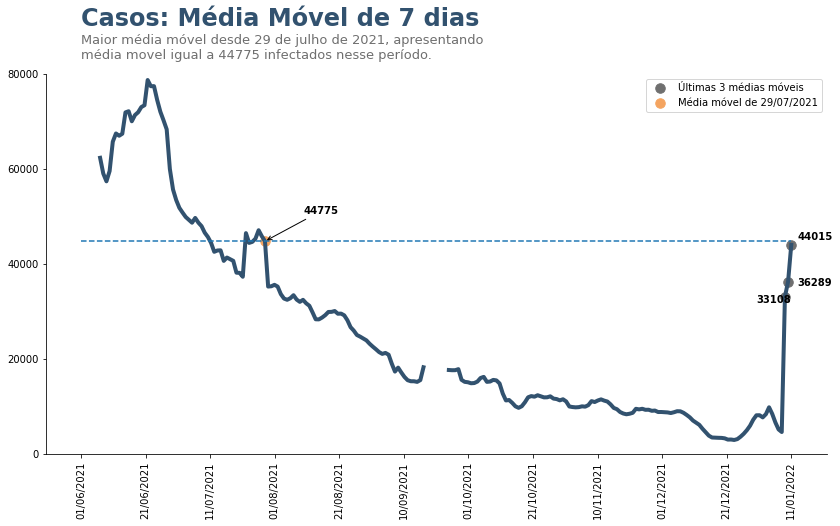

In [407]:
#vamor ver a quantidade de evolução do covid-19 no Brasil
from matplotlib.dates import  DateFormatter

#Configuração dos Gráficos (Cor)

CINZA = "#6F6F6F"
AZUL = "#32526f"
#Selecionando dados para a plotagem.

bra_new_cases = covid["location"] == "Brazil"
data_6_meses = covid["date"] >= datetime(2021,6,1)
datas_bra = covid.loc[bra_new_cases & data_6_meses]["date"].values
new_cases_bra = covid.loc[bra_new_cases & data_6_meses]["new_cases"].values
media_movel_7 = pd.Series(new_cases_bra, index=datas_bra).rolling(7).mean()


query_maior_media = media_movel_7 >= media_movel_7[-1]
media_movel_7[query_maior_media]

#Escolhendo formato de data que irá para o gráfico! Esse item precisa ser passado a função set_major_formatter
date_form = DateFormatter("%d/%m/%Y")

#datas que iram no tickslabels
datas_x = pd.date_range(start='2021-06-01', end='2022-01-11', periods=12)

#Criando gráfico
fig, ax = plt.subplots(figsize=(14,7),dpi=72)
#ax.plot(datas_bra, new_cases_bra, linewidth=3, color=CINZA, label="")
ax.plot(datas_bra, 
        media_movel_7,
        linewidth=4, 
        color=AZUL) #plotando a média movel 

ax.scatter(datas_bra[-3:],media_movel_7[-3:], color=CINZA, s=90, label="Últimas 3 médias móveis")
ax.scatter(datetime(2021,7,29), media_movel_7["2021-07-29"], s=90,color="#F4A460", label="Média móvel de 29/07/2021")
ax.legend()
ax.set_xticks(datas_x)
ax.set_xticklabels(datas_x , rotation = 90)
ax.xaxis.set_major_formatter(date_form) #setando formato para o gráfico
ax.spines[["right", "top"]].set_visible(False)
ax.set_yticks(range(0, 100000, 20000))
ax.set_yticklabels(labels=[0,20000,40000,60000,80000])
ax.set_ylim(0,80000)
ax.text(datas_bra[0],
        90000, 
        "Casos: Média Móvel de 7 dias", 
        fontsize=24, 
        fontweight="bold",
        color="#32526f")
ax.text(datas_bra[0],
        83000, 
        "Maior média móvel desde 29 de julho de 2021, apresentando \nmédia movel igual a {} infectados nesse período.".format(int(media_movel_7["2021-07-29"])), 
        fontsize=13,
        color=CINZA)
deslocamento = [-1200, -1000, 1000]
deslocamento_x = [-np.timedelta64(9,"D"), np.timedelta64(3,"D"), np.timedelta64(2,"D")] 
z=0

plt.annotate(str(int(media_movel_7["2021-07-29"])),
      horizontalalignment = 'left',
      verticalalignment = 'bottom',
      xytext = (datetime(2021,8,10),50000),
      xy = (datetime(2021,7,29), media_movel_7["2021-07-29"]),
      arrowprops=dict(arrowstyle="->",
      connectionstyle="arc3"),
      fontweight="bold", 
      fontsize=10
      )
ax.hlines(y=media_movel_7["2021-07-29"],xmin=datas_x[0],xmax=datas_x[-1], linestyles="--")



for i, j in zip(datas_bra[-3:], media_movel_7[-3:].values):
    ax.annotate(str(int(j)), xy=(i, j), xytext=(i + deslocamento_x[z], j+deslocamento[z]), fontweight="bold", fontsize=10)
    z+=1
plt.savefig(r"C:\Users\joaog\Desktop\grafico_media_movel.png", dpi=72, bbox_inches='tight')


In [416]:
print(media_movel_7["2022-01-11"], "-----------x")
print(media_movel_7["2022-01-10"], "100")
print("----------------------------------------")
print(media_movel_7["2022-01-11"]*100/media_movel_7["2022-01-08"])

121.85714285714286 -----------x
127.57142857142857 100
----------------------------------------
297.21254355400697


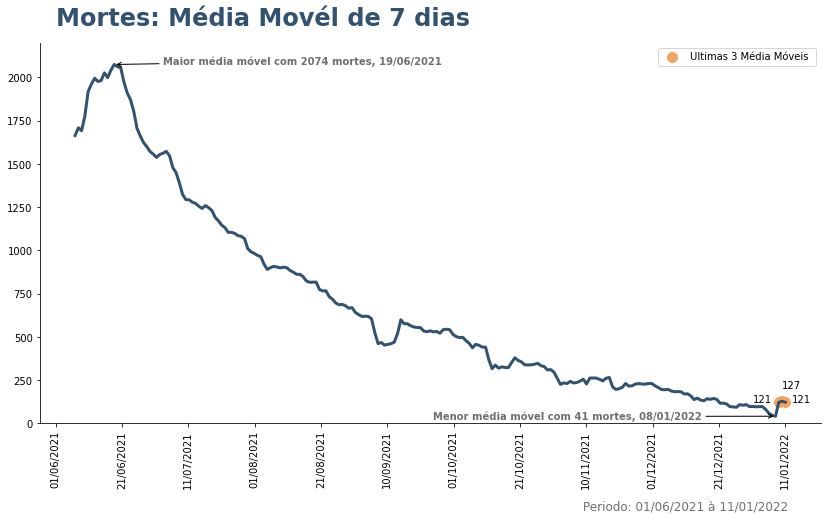

In [410]:
#vamor ver a quantidade de evolução do covid-19 no Brasil
from matplotlib.dates import  DateFormatter

#Configuração dos Gráficos (Cor)

CINZA = "#6F6F6F"
AZUL = "#32526f"
#Selecionando dados para a plotagem.

bra_total_mortes = covid["location"] == "Brazil"
data_6_meses = covid["date"] >= datetime(2021,6,1)
datas_bra = covid.loc[bra_total_mortes & data_6_meses]["date"].values
mortes = covid.loc[bra_total_mortes & data_6_meses]["new_deaths"].values
media_movel_7 = pd.Series(mortes, index=datas_bra).rolling(7).mean()

query_min = media_movel_7 == media_movel_7.min()
min = media_movel_7[query_min]
query_max = media_movel_7 == media_movel_7.max()
max = media_movel_7[query_max]


datas_x = pd.date_range(start="2021-06-01" , end="2022-01-11",periods=12)
date_form = DateFormatter("%d/%m/%Y")

par_annotate = [np.timedelta64(4,"D"), 80, -np.timedelta64(10,"D"), np.timedelta64(15,"D")]


fig, ax = plt.subplots(figsize=(14,7), dpi=72)
ax.plot(datas_bra, media_movel_7, color=AZUL, linewidth=3)
ax.set_xticks(datas_x)
ax.set_xticklabels(datas_x, rotation=90)
ax.xaxis.set_major_formatter(date_form)
ax.spines[["top", "right"]].set_visible(False)
ax.text(x=datetime(2021,6,1),y=2300 ,s="Mortes: Média Movél de 7 dias", fontsize=24, fontweight="bold", color=AZUL)
ax.text(x=datetime(2021,11,10),y=-500 ,s="Periodo: 01/06/2021 à 11/01/2022", fontsize=12, color=CINZA)
ax.scatter(datas_bra[-3:], media_movel_7[-3:], s=100, color="#F4A460", label="Ultimas 3 Média Móveis ")
ax.annotate(str(int(media_movel_7[-3])), xy=(datas_bra[-3]+ par_annotate[0]  ,media_movel_7[-3]))
ax.annotate(str(int(media_movel_7[-2])), xy=(datas_bra[-2] ,media_movel_7[-3] +par_annotate[1]))
ax.annotate(str(int(media_movel_7[-1])), xy=(datas_bra[-1] +par_annotate[2] ,media_movel_7[-1]))
ax.set_ylim(0,2200)


ax.annotate("Maior média móvel com {} mortes, 19/06/2021".format(int(max.values)),
        xy=(max.index ,
        max.values),
        xytext = (max.index + par_annotate[3], max.values),
        color=CINZA,
        fontweight="bold",
        arrowprops=dict(arrowstyle="->",
        connectionstyle="arc3"))
ax.annotate("Menor média móvel com {} mortes, 08/01/2022".format(int(min.values)),
        xy=(min.index ,
        min.values),
        xytext = (min.index -7* par_annotate[3], min.values - 20),
        color=CINZA,
        fontweight="bold",
        arrowprops=dict(arrowstyle="->",
        connectionstyle="arc3",
        ))
ax.legend()
plt.savefig(r"C:\Users\joaog\Desktop\grafico_media_movel_mortes.png", dpi=72, bbox_inches='tight')


In [411]:
query = media_movel_7 == media_movel_7.max()
min.index

DatetimeIndex(['2022-01-08'], dtype='datetime64[ns]', freq=None)

In [412]:
min.index

DatetimeIndex(['2022-01-08'], dtype='datetime64[ns]', freq=None)

In [413]:
datas_bra

array(['2021-06-01T00:00:00.000000000', '2021-06-02T00:00:00.000000000',
       '2021-06-03T00:00:00.000000000', '2021-06-04T00:00:00.000000000',
       '2021-06-05T00:00:00.000000000', '2021-06-06T00:00:00.000000000',
       '2021-06-07T00:00:00.000000000', '2021-06-08T00:00:00.000000000',
       '2021-06-09T00:00:00.000000000', '2021-06-10T00:00:00.000000000',
       '2021-06-11T00:00:00.000000000', '2021-06-12T00:00:00.000000000',
       '2021-06-13T00:00:00.000000000', '2021-06-14T00:00:00.000000000',
       '2021-06-15T00:00:00.000000000', '2021-06-16T00:00:00.000000000',
       '2021-06-17T00:00:00.000000000', '2021-06-18T00:00:00.000000000',
       '2021-06-19T00:00:00.000000000', '2021-06-20T00:00:00.000000000',
       '2021-06-21T00:00:00.000000000', '2021-06-22T00:00:00.000000000',
       '2021-06-23T00:00:00.000000000', '2021-06-24T00:00:00.000000000',
       '2021-06-25T00:00:00.000000000', '2021-06-26T00:00:00.000000000',
       '2021-06-27T00:00:00.000000000', '2021-06-28